In [7]:
import uproot # reads data from ROOT files into numpy arrays or pandas DataFrames
import numpy as np # fundamental package for numerical computing
import h5py # allows for the creation and loading of hdf5 files which are used to store large amounts of numerical data
import os # standard library for interacting with the operating system.
import matplotlib.pyplot as plt # data visualization and graphical plotting library
import pandas as pd

In [4]:
%run "GeneralFunctions.ipynb"

In [5]:
branches = branchesFromRootFile("MyxAODAnalysis_super3D.outputs.root")

cell_coordinate_x = extractData(branches, 'cell_x') #(100, 187652) 100 events and 187652 cells
cell_coordinate_y = extractData(branches, 'cell_y')
cell_coordinate_z = extractData(branches, 'cell_z')
cell_eta = extractData(branches, 'cell_eta')
cell_phi = extractData(branches, 'cell_phi')
cell_subCalo = extractData(branches, 'cell_subCalo')
cell_sampling = extractData(branches, 'cell_sampling')
cell_weight = extractData(branches, 'cell_weight')
cell_truth = extractData(branches, 'cell_truth')
cell_to_cluster_e = extractData(branches, 'cell_to_cluster_e')
cell_noiseSigma = extractData(branches, 'cell_noiseSigma')
cell_SNR = extractData(branches, 'cell_SNR')
cell_time = extractData(branches, 'cell_time')
cellsNo_cluster = branches['cellsNo_cluster'] #100 events but different number of entries per event 
# Not a np array due to irregular subarray lengths
clustersNo_event = extractData(branches, 'clustersNo_event') #(100, 1)
cell_to_cluster_index = extractData(branches, 'cell_cluster_index')
cell_e = extractData(branches, 'cell_e')
cluster_to_cell_indices = branches['cluster_to_cell_indices'] # Not a np array due to irregular subarray lengths
#100 events, but with different entries per event.
neighbor = branches['neighbor'] # Not a np array due to irregular subarray lengths
#100 events but with a repeating pattern of 
#[[63, 1, 26496, 26497, 26498, 26499, 64, 26751, 127, 26500, 65, 448], ...]...

In [25]:
data = pd.DataFrame({
    'cell_e': cell_e.flatten(),
    'cell_noise': cell_noiseSigma.flatten(),
    'cell_snr': cell_SNR.flatten()
})

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cell_e,18765200.0,-28.839096,1389.590088,-136026.218750,-37.004520,-5.030082,22.418306,413928.125000
cell_noise,18765200.0,184.173508,827.456970,0.000000,28.144690,64.892403,108.025414,20616.970703
cell_snr,18765200.0,-0.009851,1.532473,-30.948383,-0.627365,-0.102358,0.452827,1162.976196


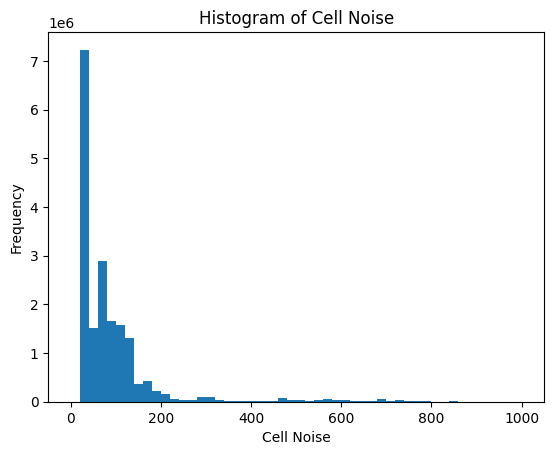

In [40]:
_ = plt.hist(data.cell_noise, bins=50, range=[0, 1000])
plt.title("Histogram of Cell Noise")
plt.xlabel("Cell Noise")
_ = plt.ylabel("Frequency")

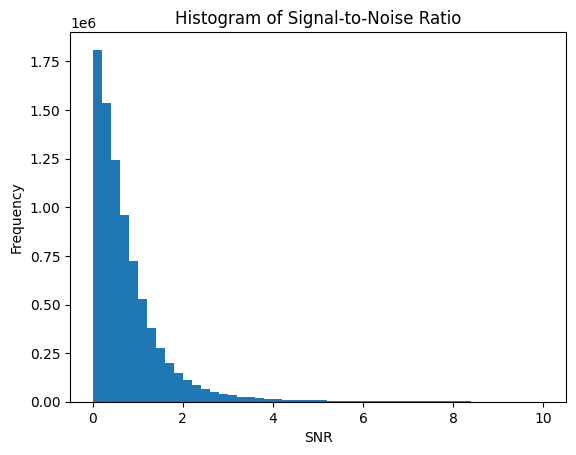

In [41]:
_ = plt.hist(data.cell_snr, bins=50, range=[0,10])
plt.title("Histogram of Signal-to-Noise Ratio")
plt.xlabel("SNR")
_ = plt.ylabel("Frequency")

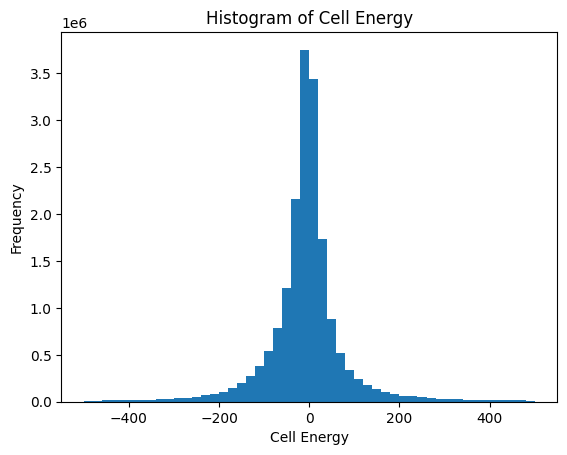

In [42]:
_ = plt.hist(data.cell_e, bins=50, range=[-500,500])
plt.title("Histogram of Cell Energy")
plt.xlabel("Cell Energy")
_ = plt.ylabel("Frequency")